<a href="https://colab.research.google.com/github/ahmedebeed555/pandas/blob/main/25Jul2025AirBNBListing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group by

In [ ]:
import pandas as pd

data = {
    'Category': ['A', 'A', 'B', 'B', 'B', 'A', 'C', 'C', 'A'],
    'Sales': [100, 200, 150, 300, 50, 120, 400, 100, 80]
}
df = pd.DataFrame(data)
print(df)


  Category  Sales
0        A    100
1        A    200
2        B    150
3        B    300
4        B     50
5        A    120
6        C    400
7        C    100
8        A     80


In [ ]:
grouped_sales = df.groupby('Category')['Sales'].sum()
print(grouped_sales)


Category
A    500
B    500
C    500
Name: Sales, dtype: int64


In [ ]:
spam_count = df.groupby('Category')['Sales'].count()
print(spam_count)


Category
A    4
B    3
C    2
Name: Sales, dtype: int64


In [ ]:
avg_sales = df.groupby('Category')['Sales'].mean()
print(avg_sales)


Category
A    125.000000
B    166.666667
C    250.000000
Name: Sales, dtype: float64


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv("/content/listings.csv")

# Inspect basic info
print("=== INITIAL DATA INFO ===")
print(df.info())
print("\nSample Rows:")
print(df.head(3))


=== INITIAL DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            447 non-null    int64  
 1   listing_url                                   447 non-null    object 
 2   scrape_id                                     447 non-null    int64  
 3   last_scraped                                  447 non-null    object 
 4   source                                        447 non-null    object 
 5   name                                          447 non-null    object 
 6   description                                   437 non-null    object 
 7   neighborhood_overview                         198 non-null    object 
 8   picture_url                                   447 non-null    object 
 9   host_id                                

In [ ]:
missing = df.isna().mean().sort_values(ascending=False) * 100
missing[missing > 50].index.tolist()

['license',
 'calendar_updated',
 'neighbourhood_group_cleansed',
 'neighbourhood',
 'neighborhood_overview']

In [ ]:
# Calculate % of missing values per column
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print("\n=== Missing Values Percentage ===")
print(missing_percent.head(20))  # show top 20

# Drop columns with more than 50% missing values
drop_missing_cols = missing_percent[missing_percent > 50].index.tolist()
print("\nDropping columns with >50% missing values:")
print(drop_missing_cols)

df = df.drop(columns=drop_missing_cols)



=== Missing Values Percentage ===
license                         100.000000
calendar_updated                100.000000
neighbourhood_group_cleansed    100.000000
neighbourhood                    55.704698
neighborhood_overview            55.704698
host_about                       46.085011
host_location                    24.161074
host_neighbourhood               15.883669
last_review                      14.988814
first_review                     14.988814
review_scores_location           14.988814
review_scores_accuracy           14.988814
reviews_per_month                14.988814
review_scores_value              14.988814
review_scores_cleanliness        14.988814
review_scores_communication      14.988814
review_scores_checkin            14.988814
review_scores_rating             14.988814
beds                              7.158837
bathrooms                         7.158837
dtype: float64

Dropping columns with >50% missing values:
['license', 'calendar_updated', 'neighbourhood

In [ ]:
unwanted_cols = [
    'listing_url', 'scrape_id', 'picture_url',
    'host_url', 'host_thumbnail_url', 'host_picture_url'
]
df = df.drop(columns=[c for c in unwanted_cols if c in df.columns])

print("\nRemaining columns after dropping identifiers:")
print(df.columns.tolist())



Remaining columns after dropping identifiers:
['id', 'last_scraped', 'source', 'name', 'description', 'host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 'number_of_review

In [ ]:
df['price'].head(20)

,price
0,$70.00
1,$100.00
2,$75.00
3,$95.00
4,$86.00
5,$52.00
6,$54.00
7,$264.00
8,$55.00
9,$47.00


In [ ]:
# Remove "$" and "," manually using string operations
if 'price' in df.columns:
    df['price'] = df['price'].astype(str)
    df['price'] = df['price'].str.replace('$', '', case=False)
    df['price'] = df['price'].str.replace(',', '', case=False)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')

print("\nPrice column statistics after conversion:")
if 'price' in df.columns:
    print(df['price'].describe())



Price column statistics after conversion:
count     415.000000
mean      121.004819
std       126.004102
min        24.000000
25%        68.000000
50%        93.000000
75%       131.500000
max      1486.000000
Name: price, dtype: float64


In [ ]:
date_cols = ['last_scraped', 'first_review', 'last_review']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

print("\nChecking date columns:")
for col in date_cols:
    if col in df.columns:
        print(f"{col}: {df[col].min()} to {df[col].max()}")



Checking date columns:
last_scraped: 2025-06-09 00:00:00 to 2025-06-09 00:00:00
first_review: 2014-07-01 00:00:00 to 2025-06-07 00:00:00
last_review: 2018-07-27 00:00:00 to 2025-06-08 00:00:00


In [ ]:
print(df[['bedrooms', 'beds', 'bathrooms']].isnull().sum())
for col in ['bedrooms', 'beds', 'bathrooms']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

print("\nMissing values after filling numerical columns:")
print(df[['bedrooms', 'beds', 'bathrooms']].isnull().sum())


bedrooms      5
beds         32
bathrooms    32
dtype: int64

Missing values after filling numerical columns:
bedrooms     0
beds         0
bathrooms    0
dtype: int64


In [ ]:
if 'reviews_per_month' in df.columns:
    df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
    print("\nReviews_per_month after filling:")
    print(df['reviews_per_month'].describe())



Reviews_per_month after filling:
count    447.000000
mean       1.654765
std        1.941697
min        0.000000
25%        0.220000
50%        1.000000
75%        2.355000
max       11.340000
Name: reviews_per_month, dtype: float64


In [ ]:

print("\n=== FINAL DATA INFO ===")
print(df.info())

print("\nAny missing values left?")
print(df.isnull().sum().sum())  # should be small or zero

print("\nSample cleaned data:")
print(df.head(3))



=== FINAL DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            447 non-null    int64         
 1   last_scraped                                  447 non-null    datetime64[ns]
 2   source                                        447 non-null    object        
 3   name                                          447 non-null    object        
 4   description                                   437 non-null    object        
 5   host_id                                       447 non-null    int64         
 6   host_name                                     447 non-null    object        
 7   host_since                                    447 non-null    object        
 8   host_location                                

In [ ]:
# Check columns with missing values
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print("\n=== Missing Data Summary ===")
print(missing_summary)



=== Missing Data Summary ===
host_about                     206
host_location                  108
host_neighbourhood              71
first_review                    67
review_scores_location          67
review_scores_value             67
review_scores_communication     67
review_scores_checkin           67
review_scores_cleanliness       67
review_scores_accuracy          67
review_scores_rating            67
last_review                     67
estimated_revenue_l365d         32
price                           32
host_response_rate              26
host_response_time              26
host_is_superhost               12
description                     10
host_acceptance_rate             8
has_availability                 6
dtype: int64


In [ ]:
df['description']

,description
0,The apartment is located in a quiet neighborho...
1,"Cozy, cool little 1BR Apt in the heart Albany'..."
2,"Spacious studio with hardwood floors, fully eq..."
3,Large renovated 1 bedroom apartment in convert...
4,(21 years of age or older ONLY) NON- SMOKING.....
...,...
442,This stylish place to stay is perfect and rela...
443,This elegant apartment on the ground floor of ...
444,Take it easy at this unique and tranquil getaway.
445,Welcome to your cozy Albany retreat! Enjoy a c...


In [ ]:
text_fill = ['description', 'host_location', 'host_about',
             'host_response_time', 'host_response_rate',
             'host_acceptance_rate', 'host_is_superhost',
             'host_neighbourhood', 'has_availability']

for col in text_fill:
    if col in df.columns:
        df[col] = df[col].fillna("Not provided")

print("\nText columns filled with placeholders.")



Text columns filled with placeholders.


In [ ]:
num_cols_fill_median = ['price', 'estimated_revenue_l365d']
for col in num_cols_fill_median:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

review_cols = [c for c in df.columns if c.startswith("review_scores")]
for col in review_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

print("\nNumerical columns filled with median or zero.")



Numerical columns filled with median or zero.


In [ ]:
print("\n=== FINAL MISSING VALUES CHECK ===")
df.isnull().sum()  # Should now be 0 or close



=== FINAL MISSING VALUES CHECK ===


,0
id,0
last_scraped,0
source,0
name,0
description,0
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


In [ ]:
df.to_csv("listings_cleaned_final.csv", index=False)
print("Final cleaned dataset saved as listings_cleaned_final.csv")


Final cleaned dataset saved as listings_cleaned_final.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("listings_cleaned_final.csv")

# Basic info
print(df.head(3))


        id last_scraped       source  \
0  2992450   2025-06-09  city scrape   
1  3820211   2025-06-09  city scrape   
2  5651579   2025-06-09  city scrape   

                                         name  \
0                  Luxury 2 bedroom apartment   
1   Restored Precinct in Center Sq. w/Parking   
2  Large studio apt  by Capital Center & ESP@   

                                         description   host_id host_name  \
0  The apartment is located in a quiet neighborho...   4621559   Kenneth   
1  Cozy, cool little 1BR Apt in the heart Albany'...  19648678     Terra   
2  Spacious studio with hardwood floors, fully eq...  29288920     Gregg   

   host_since host_location  \
0  2013-01-07  New York, NY   
1  2014-08-07  Not provided   
2  2015-03-13    Albany, NY   

                                          host_about  ...  \
0           I am a real down to earth & cool person.  ...   
1  I'm from Kansas City, MO. I've driven the enti...  ...   
2  I am an Albany native .I h

In [ ]:
df['price'].head()

,price
0,70.0
1,100.0
2,75.0
3,95.0
4,86.0


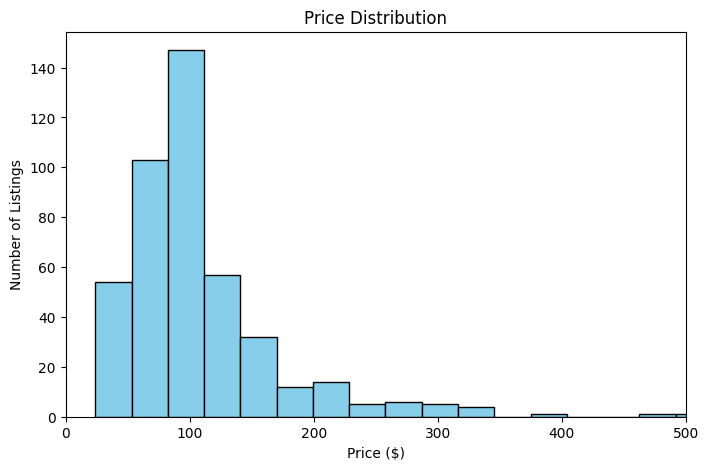

In [ ]:
plt.figure(figsize=(8, 5))
df['price'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.xlim(0, 500)  # Focus on 0-500 range (ignoring outliers)
plt.show()


In [ ]:
df['room_type'].value_counts()

,count
room_type,
Entire home/apt,326
Private room,121


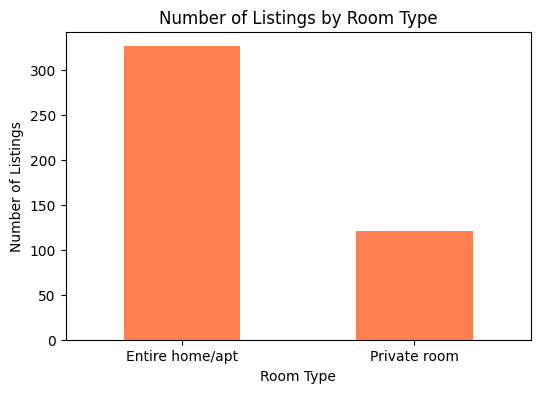

In [ ]:
room_counts = df['room_type'].value_counts()

plt.figure(figsize=(6, 4))
room_counts.plot(kind='bar', color='coral')
plt.title('Number of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)
plt.show()


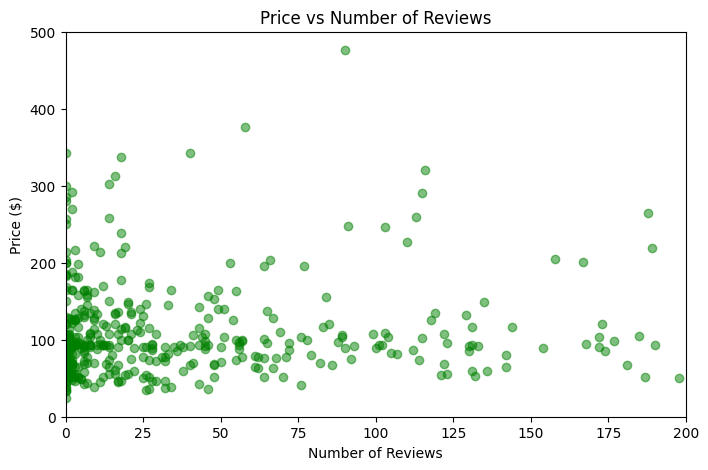

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['number_of_reviews'], df['price'], alpha=0.5, c='green')
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.xlim(0, 200)  # Focus on 0-200 reviews
plt.ylim(0, 500)  # Focus on 0-500 price
plt.show()


<Figure size 800x500 with 0 Axes>

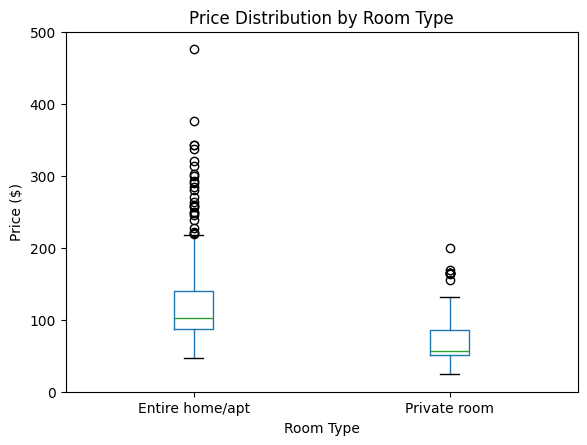

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column='price', by='room_type', grid=False)
plt.title('Price Distribution by Room Type')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.ylim(0, 500)
plt.show()


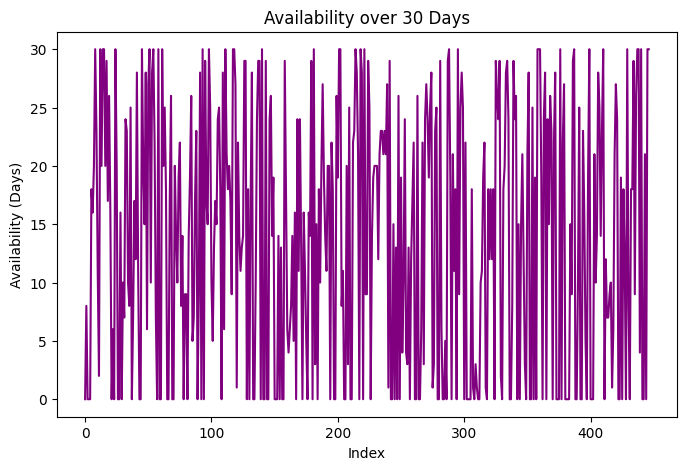

In [ ]:
plt.figure(figsize=(8, 5))
df['availability_30'].plot(kind='line', color='purple')
plt.title('Availability over 30 Days')
plt.xlabel('Index')
plt.ylabel('Availability (Days)')
plt.show()


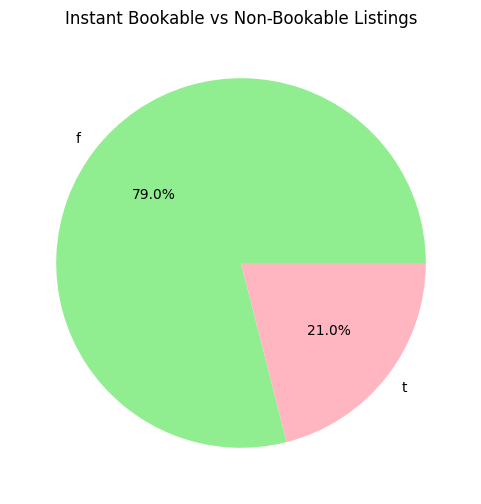

In [ ]:
instant_counts = df['instant_bookable'].value_counts()

plt.figure(figsize=(6, 6))
instant_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightpink'])
plt.title('Instant Bookable vs Non-Bookable Listings')
plt.ylabel('')
plt.show()


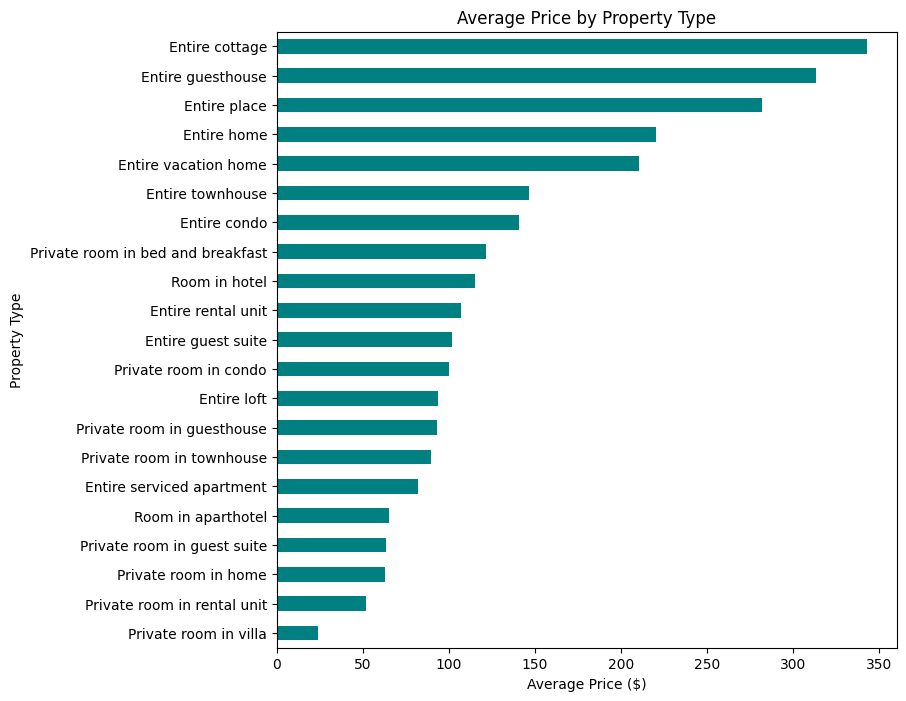

In [ ]:
avg_price_property = df.groupby('property_type')['price'].mean().sort_values()

plt.figure(figsize=(8, 8))
avg_price_property.plot(kind='barh', color='teal')
plt.title('Average Price by Property Type')
plt.xlabel('Average Price ($)')
plt.ylabel('Property Type')
plt.show()


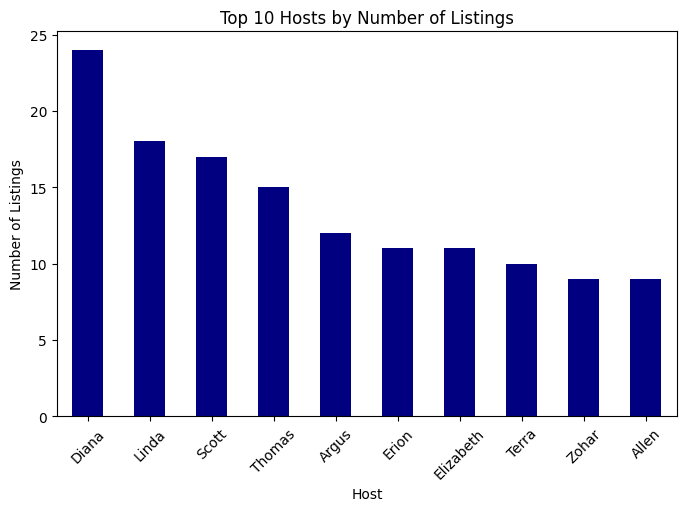

In [ ]:
top_hosts = df['host_name'].value_counts().head(10)

plt.figure(figsize=(8, 5))
top_hosts.plot(kind='bar', color='navy')
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Host')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


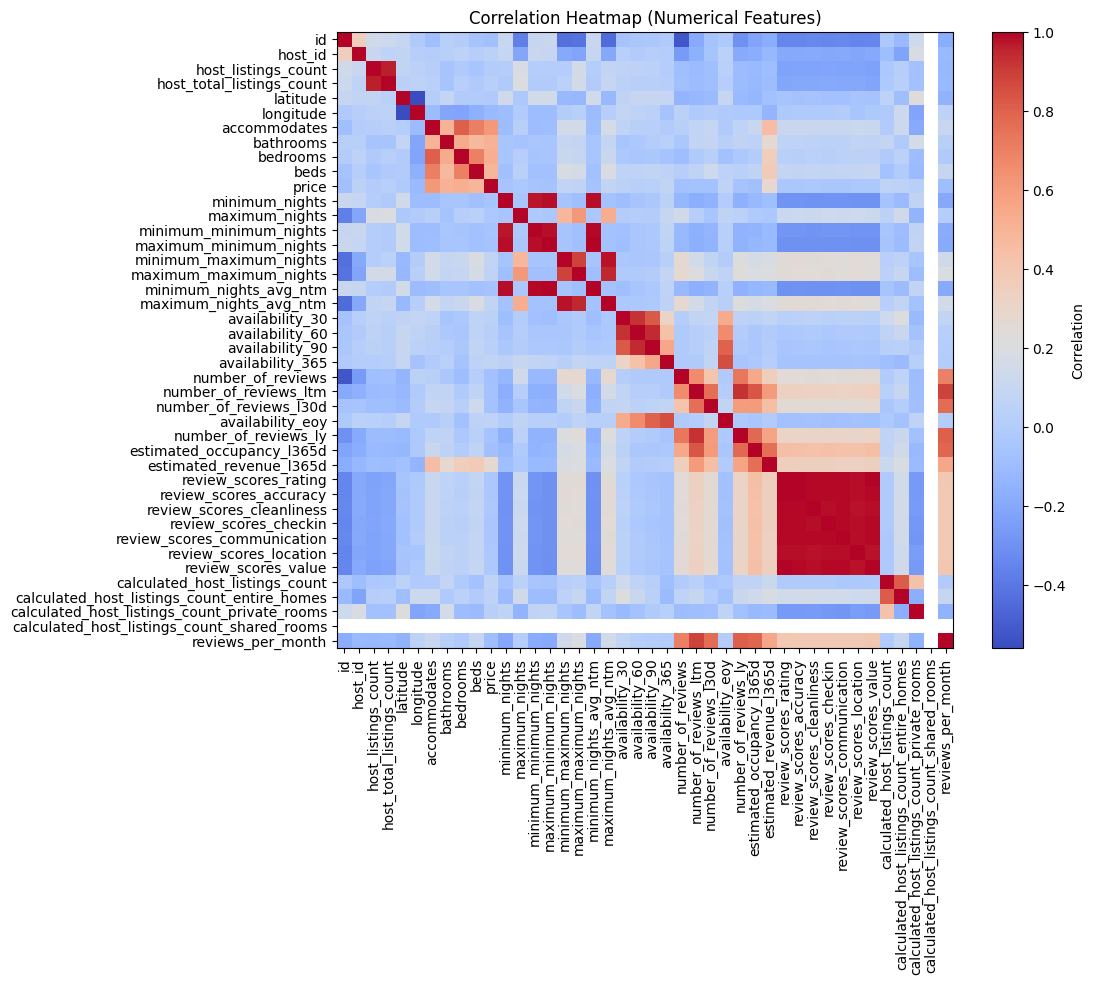

In [ ]:
import numpy as np

# Select only numerical columns
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


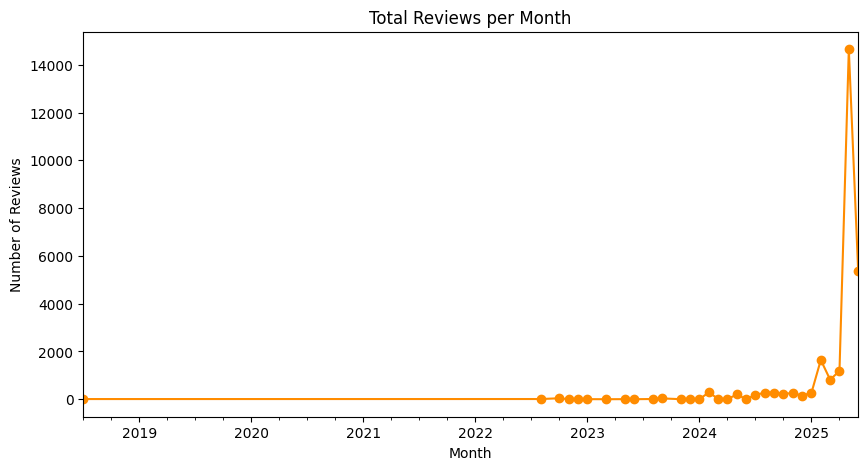

In [ ]:
# Convert last_review column to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Now group by month
reviews_by_month = df.groupby(df['last_review'].dt.to_period('M'))['number_of_reviews'].sum()

# Plot
plt.figure(figsize=(10, 5))
reviews_by_month.plot(kind='line', marker='o', color='darkorange')
plt.title('Total Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()


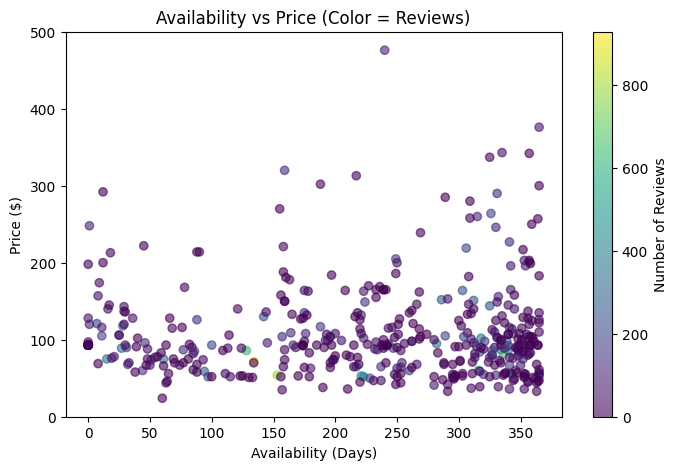

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['availability_365'], df['price'], c=df['number_of_reviews'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Number of Reviews')
plt.title('Availability vs Price (Color = Reviews)')
plt.xlabel('Availability (Days)')
plt.ylabel('Price ($)')
plt.ylim(0, 500)
plt.show()



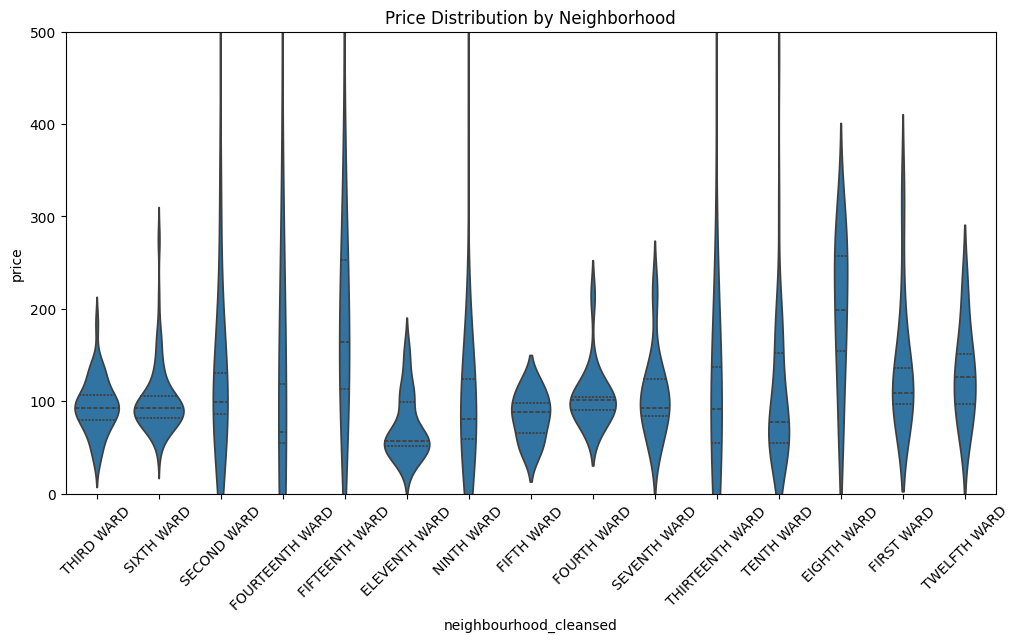

In [ ]:
import seaborn as sns

if 'neighbourhood_cleansed' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='neighbourhood_cleansed', y='price', data=df, inner='quartile')
    plt.title('Price Distribution by Neighborhood')
    plt.ylim(0, 500)
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Convert date columns to datetime
date_columns = ['last_scraped', 'calendar_last_scraped', 'first_review', 'last_review']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

df[date_columns].dtypes  # Verify conversion


,0
last_scraped,datetime64[ns]
calendar_last_scraped,datetime64[ns]
first_review,datetime64[ns]
last_review,datetime64[ns]


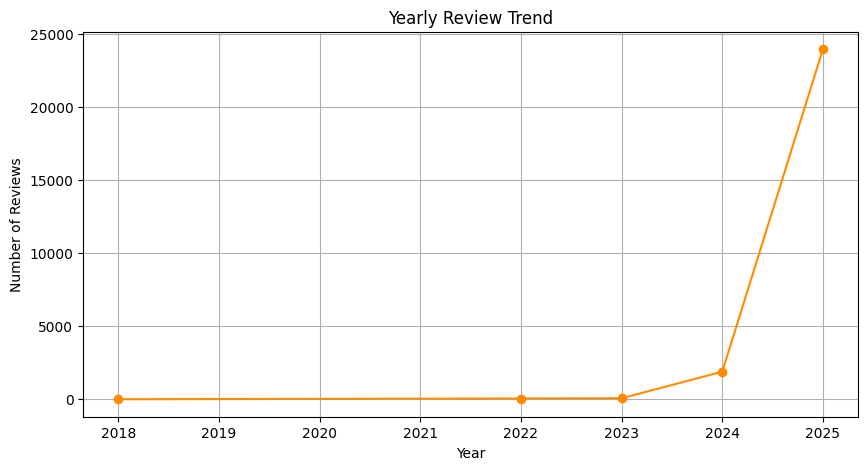

In [ ]:
reviews_by_year = (
    df.groupby(df['last_review'].dt.year)['number_of_reviews']
    .sum()
    .sort_index()
)

plt.figure(figsize=(10, 5))
reviews_by_year.plot(marker='o', color='darkorange')
plt.title('Yearly Review Trend')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


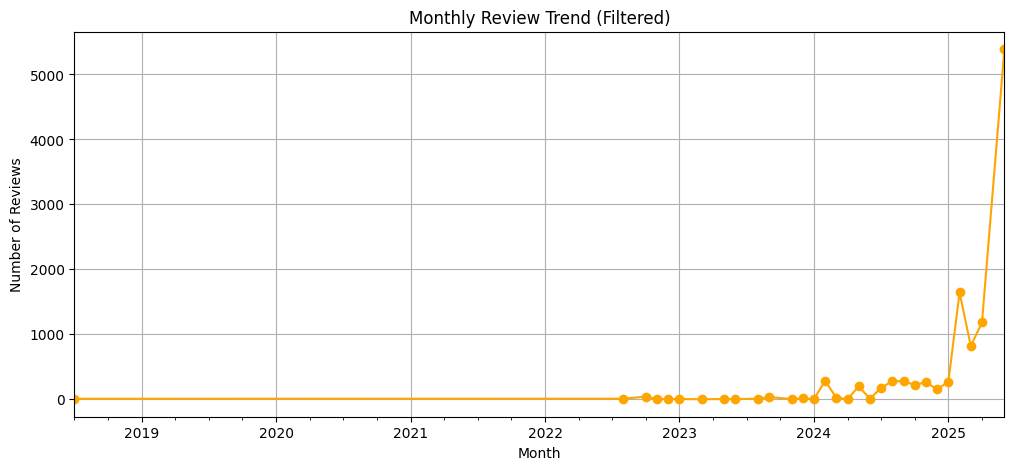

In [ ]:
reviews_by_month = (
    df.groupby(df['last_review'].dt.to_period('M'))['number_of_reviews']
    .sum()
    .sort_index()
)

# Optional: Remove months with unrealistic spikes
reviews_by_month = reviews_by_month[reviews_by_month < reviews_by_month.quantile(0.99)]

plt.figure(figsize=(12, 5))
reviews_by_month.plot(marker='o', color='orange')
plt.title('Monthly Review Trend (Filtered)')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


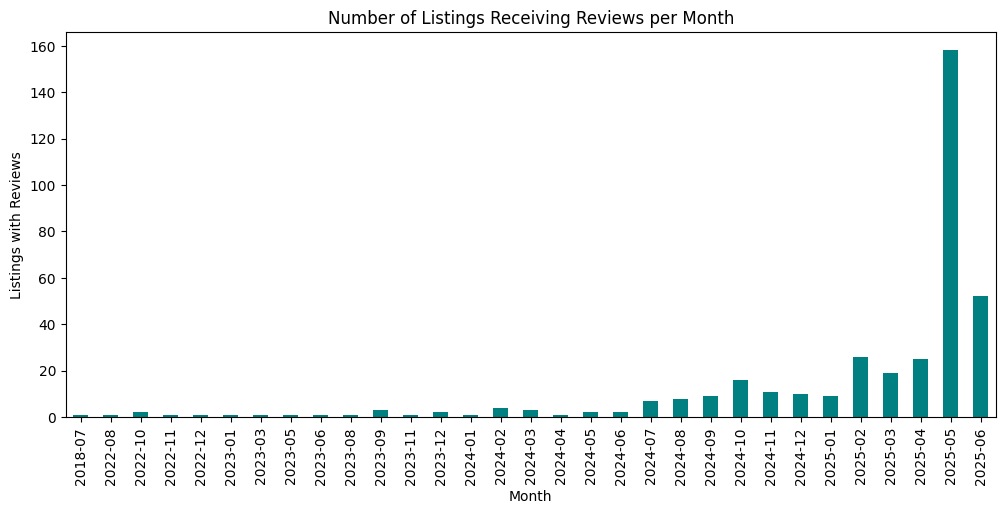

In [ ]:
reviews_frequency = df.groupby(df['last_review'].dt.to_period('M')).size()

plt.figure(figsize=(12, 5))
reviews_frequency.plot(kind='bar', color='teal')
plt.title('Number of Listings Receiving Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Listings with Reviews')
plt.show()


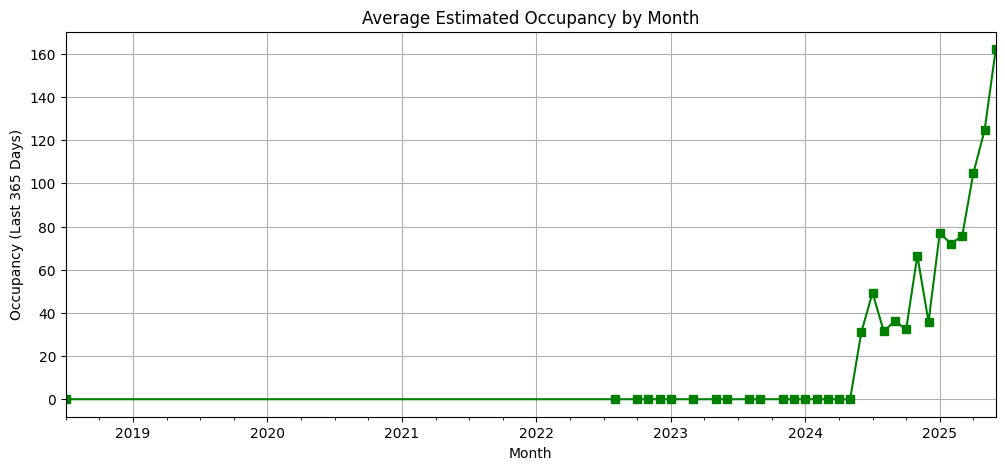

In [ ]:
if 'last_review' in df.columns and 'estimated_occupancy_l365d' in df.columns:
    occupancy_trend = (
        df.groupby(df['last_review'].dt.to_period('M'))['estimated_occupancy_l365d']
        .mean()
        .sort_index()
    )

    plt.figure(figsize=(12, 5))
    occupancy_trend.plot(marker='s', color='green')
    plt.title('Average Estimated Occupancy by Month')
    plt.xlabel('Month')
    plt.ylabel('Occupancy (Last 365 Days)')
    plt.grid(True)
    plt.show()
